In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [38]:
hist_vel = pd.read_csv("datasets/historico_velocidad_internet.csv")
BAF = pd.read_csv("datasets/Internet_BAF.csv")
penetracion = pd.read_csv("datasets/Internet_Penetracion.csv")
tec = pd.read_csv("datasets/Internet_Accesos-por-tecnologia.csv")
prov = pd.read_csv("datasets/Internet_Accesos-por-velocidad.csv")

In [39]:
hist_vel.head()

,Mbps (Media de bajada),trimestre_año
0,62.46,2022 T3
1,58.44,2022 T2
2,55.11,2022 T1
3,52.34,2021 T4
4,48.46,2021 T3


In [51]:
hist_vel["Mbps (Media de bajada)"].describe()

count    35.000000
mean     21.827143
std      19.230717
min       3.620000
25%       5.250000
50%      13.850000
75%      39.495000
max      62.460000
Name: Mbps (Media de bajada), dtype: float64

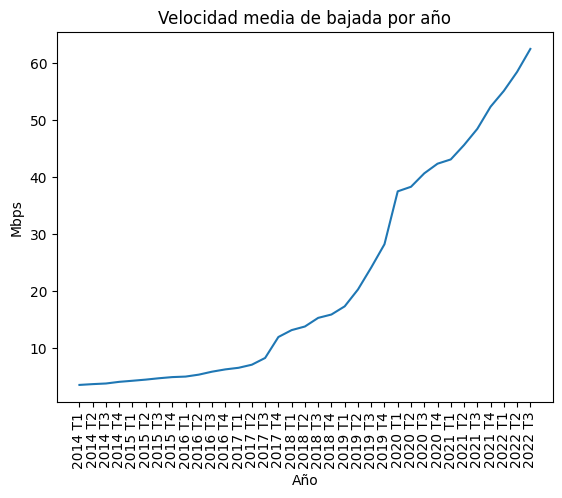

In [41]:
#Graficamos la velocidad media de bajada por año para verificar que no haya tendencias extrañas en los graficos
df_media_anual = hist_vel.groupby('trimestre_año')['Mbps (Media de bajada)'].mean().reset_index()

plt.plot(df_media_anual['trimestre_año'], df_media_anual['Mbps (Media de bajada)'])

plt.title('Velocidad media de bajada por año')
plt.xlabel('Año')
plt.ylabel('Mbps')
plt.xticks(rotation=90)
plt.show()

In [42]:
BAF.head()

,Banda ancha fija,Dial up,Total,trimestre_año
0,11078691,12437,11091128,2022 T3
1,10946248,12436,10958684,2022 T2
2,10611390,12619,10624009,2022 T1
3,10476933,12861,10489794,2021 T4
4,10075184,10357,10085541,2021 T3


In [52]:
# Podemos notar como la variabilidad de los datos "Dial up" es bastante alta
BAF["Dial up"].describe()

count       35.000000
mean     20247.000000
std      11533.554299
min       2853.000000
25%      10072.000000
50%      21793.000000
75%      30510.000000
max      39324.000000
Name: Dial up, dtype: float64

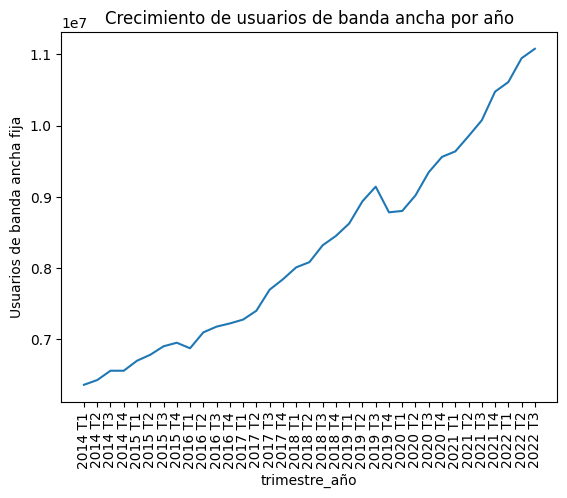

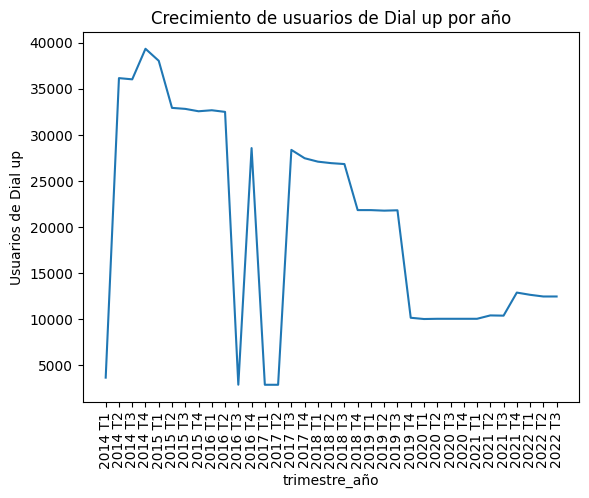

In [43]:
df_baf = BAF.groupby('trimestre_año')['Banda ancha fija'].mean()
df_dialup = BAF.groupby('trimestre_año')['Dial up'].mean()

# Aqui podemos notar que el crecimiento de de usuarios de banda ancha guarda cierta relacion con el crecimiento de velocidad media de bajada
plt.plot(df_baf.index, df_baf.values)
plt.xlabel('trimestre_año')
plt.ylabel('Usuarios de banda ancha fija')
plt.title('Crecimiento de usuarios de banda ancha por año')
plt.xticks(rotation=90)
plt.show()

# En este grafico se pueden ver dos grandes caidas en los usuarios de dial up, y dos fuertes recuperaciones, dichas caidas pueden interpretarse como outliers
plt.plot(df_dialup.index, df_dialup.values)
plt.xlabel('trimestre_año')
plt.ylabel('Usuarios de Dial up')
plt.title('Crecimiento de usuarios de Dial up por año')
plt.xticks(rotation=90)
plt.show()

In [44]:
penetracion.head()

,Provincia,Accesos por cada 100 hogares,trimestre_año
0,Tucumán,33.42,2014 T1
1,Tierra Del Fuego,63.97,2014 T1
2,Santiago Del Estero,16.31,2014 T1
3,Santa Fe,47.85,2014 T1
4,Santa Cruz,28.94,2014 T1


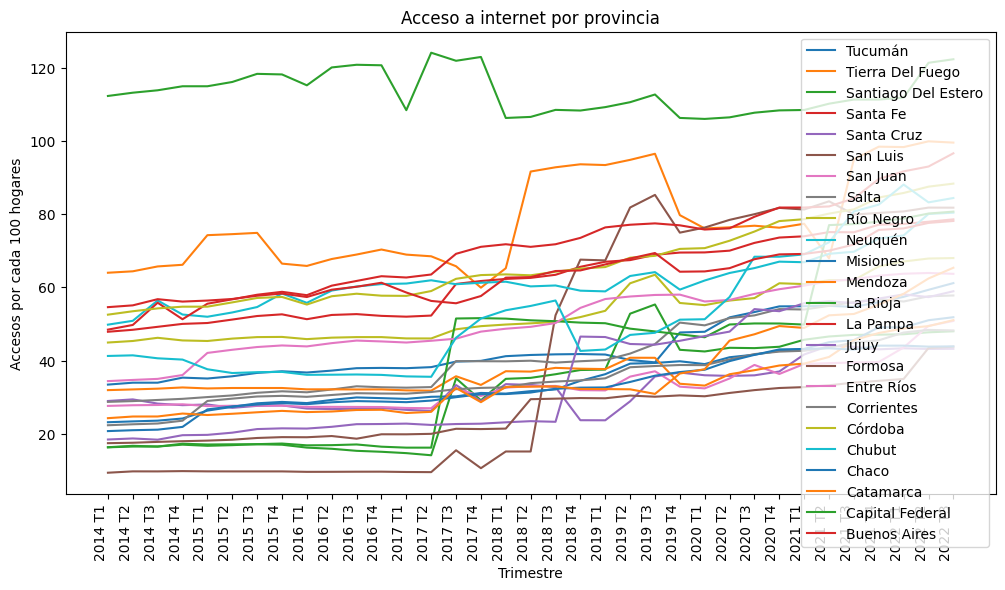

In [45]:
# Podemos ver en este grafico una tendencia creciente de acceso al internet en todas las provincias, siendo San Luis la provincia con mayor crecimiento en este periodo y capital federal
# el lugar con mayor acceso a internet
provincias = penetracion["Provincia"].unique()

plt.figure(figsize=(12, 6))

for provincia in provincias:
    datos_provincia = penetracion[penetracion["Provincia"] == provincia]
    x = datos_provincia["trimestre_año"]
    y = datos_provincia["Accesos por cada 100 hogares"]
    plt.plot(x, y, label=provincia)

plt.legend()
plt.title("Acceso a internet por provincia")
plt.xlabel("Trimestre")
plt.ylabel("Accesos por cada 100 hogares")
plt.xticks(rotation=90, ha='right')

plt.show()

In [46]:
tec.head()

,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total,trimestre_año
0,1395277,6031970,2871541,55711,23523,11091128,2022 T3
1,1468333,5979214,2723285,556243,231609,10958684,2022 T2
2,1533240,6073426,2219533,545814,251996,10624009,2022 T1
3,1657615,5984240,2072236,523107,252596,10489794,2021 T4
4,1950631,5826257,1566048,492415,25019,10085541,2021 T3


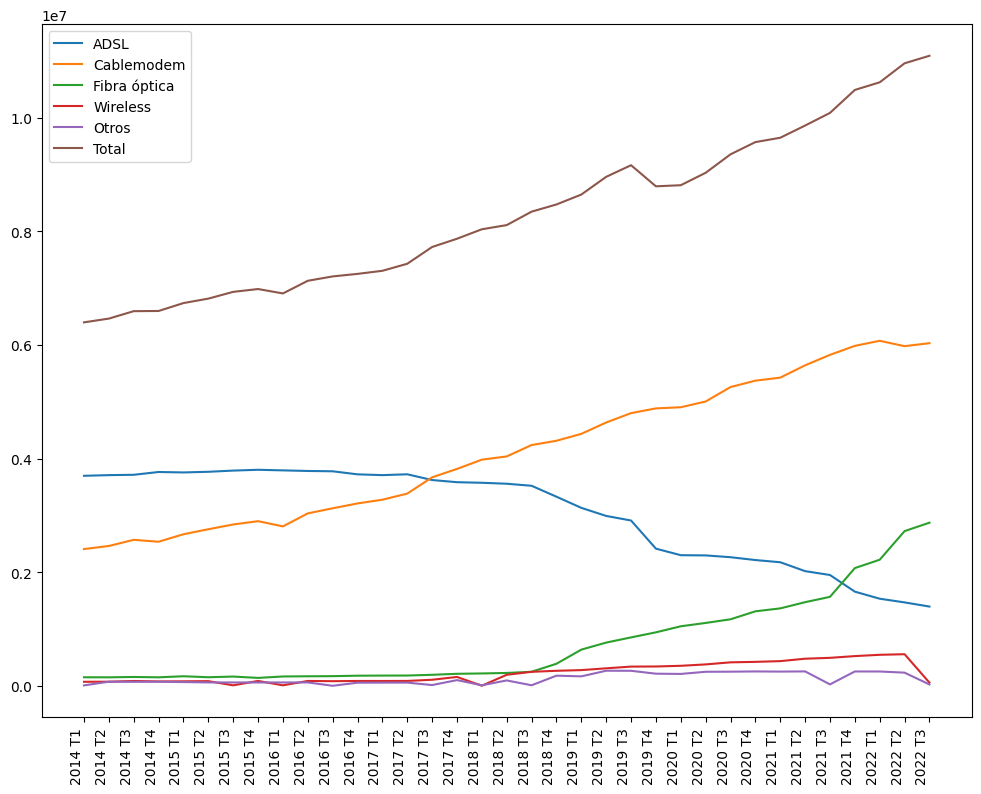

In [47]:
# Este grafico muestra la tendencia creciente de las tecnologias cablemodem y fibra optica, en deterioro de las demas tecnologias
# esto guarda relacion con el crecimiento de la velocidad media, siendo necesarias tecnologias modernas para el crecimiento de la misma

df = tec.sort_values(by='trimestre_año')

plt.figure(figsize=(12, 9))
plt.plot(df['trimestre_año'], df['ADSL'], label='ADSL')
plt.plot(df['trimestre_año'], df['Cablemodem'], label='Cablemodem')
plt.plot(df['trimestre_año'], df['Fibra óptica'], label='Fibra óptica')
plt.plot(df['trimestre_año'], df['Wireless'], label='Wireless')
plt.plot(df['trimestre_año'], df['Otros'], label='Otros')
plt.plot(df['trimestre_año'], df['Total'], label='Total')

plt.xticks(rotation=90, ha='right')
plt.legend()
plt.show()

In [48]:
prov.head()

,Provincia,HASTA 512 kbps,+ 512 Kbps - 1 Mbps,+ 1 Mbps - 6 Mbps,+ 6 Mbps - 10 Mbps,+ 10 Mbps - 20 Mbps,+ 20 Mbps - 30 Mbps,+ 30 Mbps,OTROS,Total,trimestre_año
0,Buenos Aires,29985,27709,290315,297915,267044,12419,3618689,65.821,4721668,2022 T3
1,Capital Federal,5170,5742,34371,67829,51946,28692,1253105,105.477,1547679,2022 T3
2,Catamarca,710,3840,3107,5389,5099,3737,50298,2.208,70293,2022 T3
3,Chaco,4610,9870,16782,18938,8049,15828,79390,3.711,144146,2022 T3
4,Chubut,1090,1444,45707,3094,34682,15309,17563,20.024,165778,2022 T3


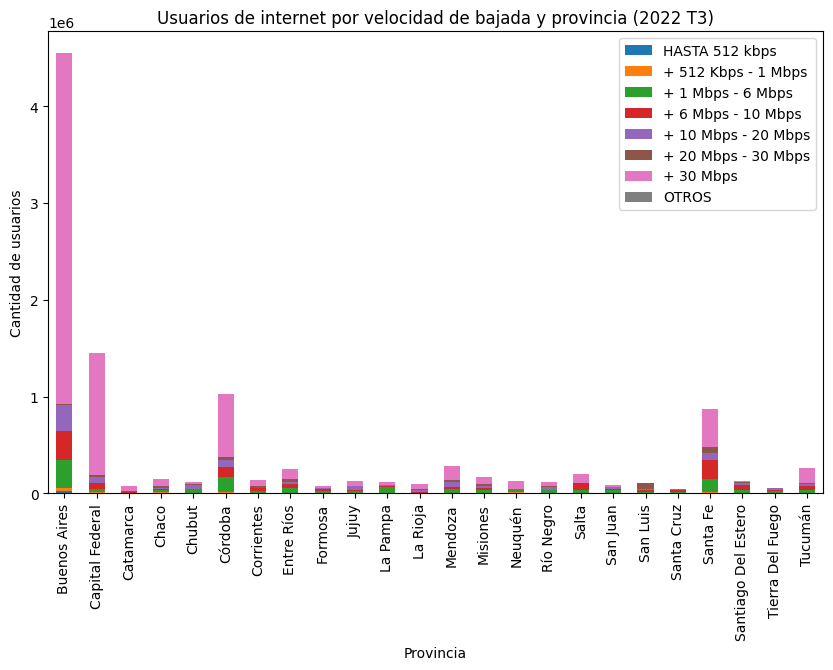

In [49]:
# Aqui vemos como el segmento de "más de 30 Mbps" es el mas popular entre los usuarios, siendo en su mayoria, mas de la mitad de los usuarios

df = prov[prov["trimestre_año"] == "2022 T3"]
velocidades = ["HASTA 512 kbps", "+ 512 Kbps - 1 Mbps", "+ 1 Mbps - 6 Mbps", "+ 6 Mbps - 10 Mbps", "+ 10 Mbps - 20 Mbps", "+ 20 Mbps - 30 Mbps", "+ 30 Mbps", "OTROS"]

ax = df.set_index("Provincia")[velocidades].plot(kind="bar", stacked=True, figsize=(10,6))
ax.set_ylabel("Cantidad de usuarios")
ax.set_title("Usuarios de internet por velocidad de bajada y provincia (2022 T3)")

plt.show()

C:\Users\Abel\AppData\Local\Temp\ipykernel_4016\3039638302.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_grouped = prov.groupby(["trimestre_año"]).sum()


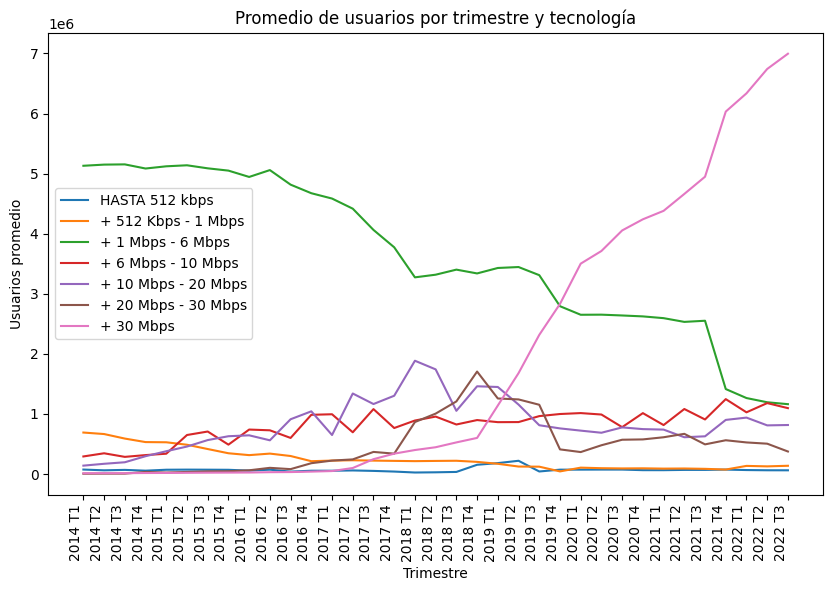

In [50]:
# En este grafico podemos ver el repido crecimiento de los usuarios de "más de 30 Mbps" y a su vez como el segmento de entre 1 y 6 Mbps disminuye drasticamente

df_grouped = prov.groupby(["trimestre_año"]).sum()

tech_cols = prov.columns[1:8]

fig, ax = plt.subplots(figsize=(10,6))

for tech in tech_cols:
    ax.plot(df_grouped.index, df_grouped[tech], label=tech)

ax.set_title("Promedio de usuarios por trimestre y tecnología")
ax.set_xlabel("Trimestre")
ax.set_ylabel("Usuarios promedio")
ax.legend()
plt.xticks(rotation=90, ha='right')
plt.show()